# In this notebook, we are going to use *BeatutifulSoup* to do some web scraping. Follow me, it's very cool!

In [227]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [228]:
url = 'https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins'
data  = requests.get(url).text 

In [229]:
soup = BeautifulSoup(data, 'html5lib')

In [230]:
table = soup.find('table')
table_rows = table.find_all('tr')
# print(table_rows)

In [231]:
table_contents=[]
for i in range(1,len(table_rows)):
    row = table_rows[i].findAll('td')
    cell = {}
    cell['Borough'] = row[1].b.span.text.strip('\n')
    if i < 10:
         cell['Neighborhood'] = row[2].text.replace('0'+str(i)+'01 ','').replace('0'+str(i)+'02 ',', ').replace('0'+str(i)+'03 ',', ').replace('0'+str(i)+'04 ',', ').replace('0'+str(i)+'05 ',', ').replace('0'+str(i)+'06 ',', ').replace('0'+str(i)+'07 ',', ').replace('0'+str(i)+'08 ',', ').replace('0'+str(i)+'09 ',', ').replace('0'+str(i)+'10 ',', ').replace('0'+str(i)+'11 ',', ').replace('0'+str(i)+'12 ',', ').replace('0'+str(i)+'13 ',', ').replace('0'+str(i)+'14 ',', ').replace('0'+str(i)+'15 ',', ').strip('\n')
    else:
         cell['Neighborhood'] = row[2].text.replace(str(i)+'01 ','').replace(str(i)+'02 ',', ').replace(str(i)+'03 ',', ').replace(str(i)+'04 ',', ').replace(str(i)+'05 ',', ').replace(str(i)+'06 ',', ').replace(str(i)+'07 ',', ').replace(str(i)+'08 ',', ').replace(str(i)+'09 ',', ').replace(str(i)+'10 ',', ').replace(str(i)+'11 ',', ').replace(str(i)+'12 ',', ').replace(str(i)+'13 ',', ').replace(str(i)+'14 ',', ').replace(str(i)+'15 ',', ').strip('\n')
    cell['Area'] = row[3].text.strip('\n').replace(',', '')
    cell['Population'] = row[4].text.strip('\n').replace(',', '')
    cell['Density'] = row[5].text.strip('\n').replace(',', '')
    table_contents.append(cell)

# print(table_contents)
df = pd.DataFrame(table_contents)
df[['Population','Area','Density']] = df[['Population','Area','Density']].astype(float)
df

,Borough,Neighborhood,Area,Population,Density
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373


In [232]:
Berlin = df['Borough'].to_frame()
Berlin = Berlin.append({'Borough':'Berlin'},ignore_index=True)
Berlin

,Borough
0,Mitte
1,Friedrichshain-Kreuzberg
2,Pankow
3,Charlottenburg-Wilmersdorf
4,Spandau
5,Steglitz-Zehlendorf
6,Tempelhof-Schöneberg
7,Neukölln
8,Treptow-Köpenick
9,Marzahn-Hellersdorf


In [233]:
Berlin = Berlin.values.tolist()

In [234]:
flat = []
for i in range(0,len(Berlin)):
      flat += Berlin[i] 
Berlin = flat
Berlin

['Mitte',
 'Friedrichshain-Kreuzberg',
 'Pankow',
 'Charlottenburg-Wilmersdorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Neukölln',
 'Treptow-Köpenick',
 'Marzahn-Hellersdorf',
 'Lichtenberg',
 'Reinickendorf',
 'Berlin']

In [235]:
Berlin_Mieten = pd.DataFrame([[13.70, 13.11, 10.50, 12.38, 8.53, 10.31, 9.97, 9.38, 10.19, 8.02, 9.08, 8.84, 10.14],
                      [13.45, 13.01, 10.96, 12.63, 8.86, 10.70, 10.52, 10.10, 9.93, 7.90, 9.27, 9.42, 10.45],
                      [12.51, 12.94, 10.97, 12.00, 8.59, 10.44, 10.30, 10.00, 9.62, 7.77, 9.53, 9.17, 10.32],
                      [12.77, 12.50, 10.86, 11.86, 7.95, 10.00, 9.97, 10.00, 9.16, 7.16, 9.72, 8.73, 10.15],
                      [10.51, 11.50, 9.99, 10.53, 7.35, 9.38, 9.00, 9.00, 8.24, 6.51, 8.80, 8.00, 9.07],
                      [10.06, 10.99, 9.45, 10.00, 6.99, 8.87, 8.50, 8.57, 7.81, 5.76, 8.10, 7.50, 8.80],
                      [9.36, 9.98, 8.99, 9.49, 6.58, 8.50, 8.01, 7.73, 7.12, 5.80, 7.50, 6.92, 8.25],
                      [9.39, 9.64, 8.56, 9.86, 6.48, 8.50, 8.00, 7.33, 7.08, 5.55, 7.01, 6.86, 8.05],
                      [8.03, 8.61, 8.00, 8.93, 5.93, 7.99, 7.49, 6.70, 6.55, 5.08, 6.53, 6.31, 7.40],
                      [6.18, 7.00, 6.73, 7.53, 5.28, 6.88, 6.23, 5.57, 5.80, 4.85, 5.65, 5.49, 6.17],
                      [5.37, 6.42, 6.13, 6.56, 5.26, 6.29, 5.84, 5.19, 5.55, 4.86, 5.51, 5.26, 5.82]],
                      columns=Berlin)
Berlin_Mieten['Year'] = [2020-i for i in range(0,9)]+[2010,2009]
new_columns = ['Year'] + Berlin
Berlin_Mieten = Berlin_Mieten[new_columns].sort_values(['Year'],ascending=True).reset_index(drop=True)
Berlin_Mieten

,Year,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf,Berlin
0,2009,5.37,6.42,6.13,6.56,5.26,6.29,5.84,5.19,5.55,4.86,5.51,5.26,5.82
1,2010,6.18,7.00,6.73,7.53,5.28,6.88,6.23,5.57,5.80,4.85,5.65,5.49,6.17
2,2012,8.03,8.61,8.00,8.93,5.93,7.99,7.49,6.70,6.55,5.08,6.53,6.31,7.40
3,2013,9.39,9.64,8.56,9.86,6.48,8.50,8.00,7.33,7.08,5.55,7.01,6.86,8.05
4,2014,9.36,9.98,8.99,9.49,6.58,8.50,8.01,7.73,7.12,5.80,7.50,6.92,8.25
5,2015,10.06,10.99,9.45,10.00,6.99,8.87,8.50,8.57,7.81,5.76,8.10,7.50,8.80
6,2016,10.51,11.50,9.99,10.53,7.35,9.38,9.00,9.00,8.24,6.51,8.80,8.00,9.07
7,2017,12.77,12.50,10.86,11.86,7.95,10.00,9.97,10.00,9.16,7.16,9.72,8.73,10.15
8,2018,12.51,12.94,10.97,12.00,8.59,10.44,10.30,10.00,9.62,7.77,9.53,9.17,10.32
9,2019,13.45,13.01,10.96,12.63,8.86,10.70,10.52,10.10,9.93,7.90,9.27,9.42,10.45


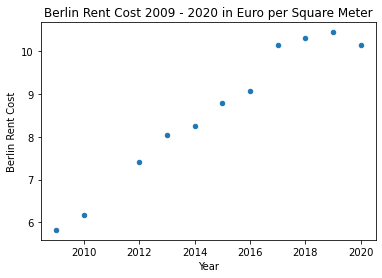

In [236]:
fig = Berlin_Mieten.plot(kind='scatter', x='Year', y='Berlin')
fig.set_title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
fig.set_xlabel('Year')
fig.set_ylabel('Berlin Rent Cost')
plt.show()

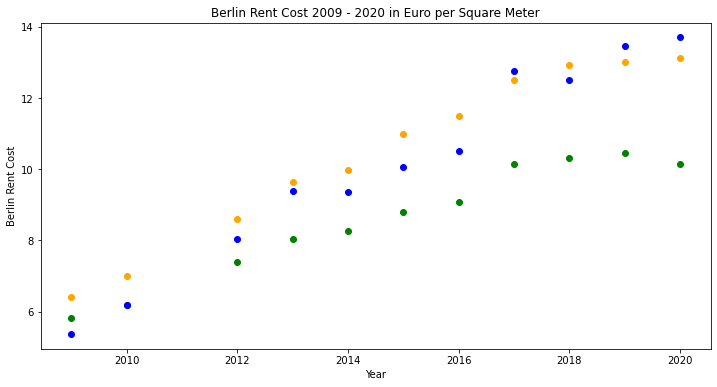

In [237]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Berlin"],  color='green')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Mitte"],  color='blue')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Friedrichshain-Kreuzberg"],  color='orange')
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.show()

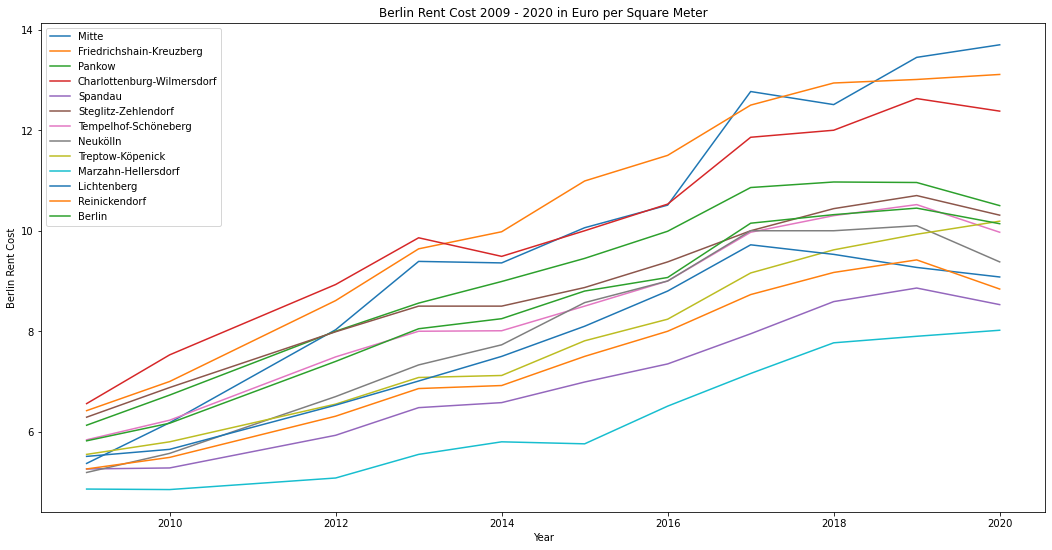

In [238]:
plt.figure(figsize = (18,9))
plt.plot(Berlin_Mieten['Year'], Berlin_Mieten[Berlin])
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.legend(Berlin)
plt.show()

In [239]:
from sklearn import linear_model
x = np.asanyarray(Berlin_Mieten[['Year']])
y_B = np.asanyarray(Berlin_Mieten[['Berlin']])
y_M = np.asanyarray(Berlin_Mieten[['Mitte']])
y_FK = np.asanyarray(Berlin_Mieten[['Friedrichshain-Kreuzberg']])
regr_Berlin = linear_model.LinearRegression().fit (x, y_B)
regr_Mitte = linear_model.LinearRegression().fit (x, y_M)
regr_FK = linear_model.LinearRegression().fit (x, y_FK)

# The coefficients
print ('Coefficients: ', regr_Berlin.coef_)
print ('Intercept: ',regr_Berlin.intercept_)

Coefficients:  [[0.44519635]]
Intercept:  [-888.3878892]


Text(0, 0.5, 'Berlin Rent')

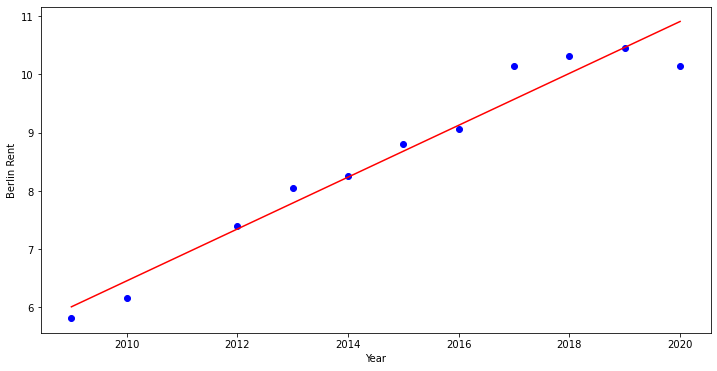

In [240]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Berlin,  color='blue')
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin Rent")

Text(0, 0.5, 'Berlin-Mitte Rent')

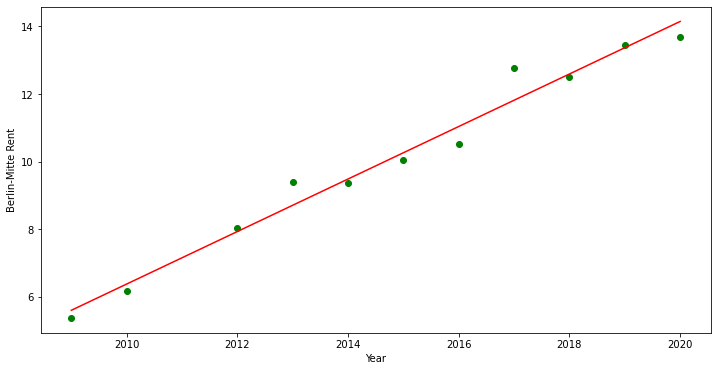

In [241]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Mitte,  color='green')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin-Mitte Rent")

Text(0, 0.5, 'Berlin-Friedrichshain-Kreuzberg Rent')

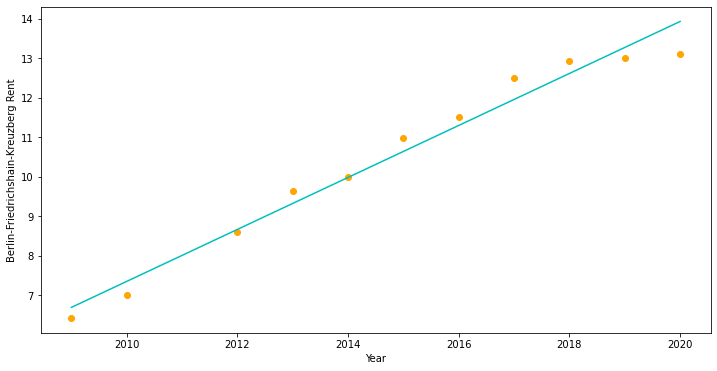

In [242]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten['Friedrichshain-Kreuzberg'],  color='orange')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-c')
plt.xlabel("Year")
plt.ylabel("Berlin-Friedrichshain-Kreuzberg Rent")

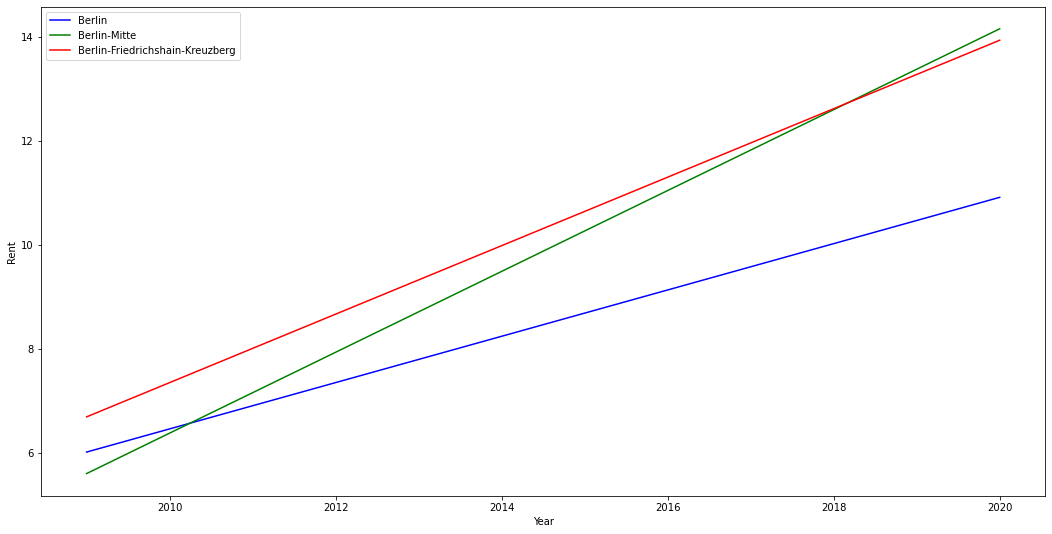

In [243]:
plt.figure(figsize = (18,9))
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-b', label='Berlin')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-g', label='Berlin-Mitte')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-r', label='Berlin-Friedrichshain-Kreuzberg')
plt.xlabel("Year")
plt.ylabel("Rent")
plt.legend()
plt.show()

# Let's get the coordinates of Toronto and explore the neighborhoods using the map.

In [244]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [245]:
geolocator = Nominatim(user_agent="ny_explorer")
Position = []
for i in range(0,len(Berlin)):
                 location = geolocator.geocode(Berlin[i]+', Berlin')
                 latitude = location.latitude
                 longitude = location.longitude
                 Position.append({'Borough':Berlin[i], 'Latitude':latitude, 'Longitude':longitude})
Position = pd.DataFrame(Position)
Position

,Borough,Latitude,Longitude
0,Mitte,52.517885,13.404060
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Pankow,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.535788,13.197792
5,Steglitz-Zehlendorf,52.429205,13.229974
6,Tempelhof-Schöneberg,52.440603,13.373703
7,Neukölln,52.481150,13.435350
8,Treptow-Köpenick,52.417893,13.600185
9,Marzahn-Hellersdorf,52.522523,13.587663


In [246]:
!pip install folium
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Position['Latitude'], Position['Longitude'], Position['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    if borough == 'Berlin':
           c = 'red'
    else:
           c = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [247]:
df = df.join(Position.drop(index=12).set_index('Borough'), on='Borough', how='right')
df 

,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773,52.517885,13.404060
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404,52.501115,13.444285
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309,52.507856,13.263952
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668,52.535788,13.197792
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025,52.429205,13.229974
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611,52.440603,13.373703
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343,52.481150,13.435350
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625,52.417893,13.600185
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373,52.522523,13.587663


In [254]:
Mitte = list(map(str.strip,df.loc[0,'Neighborhood'].split(',')))
Mitte

['Mitte', 'Moabit', 'Hansaviertel', 'Tiergarten', 'Wedding', 'Gesundbrunnen']

In [256]:
Friedrichshain_Kreuzberg = list(map(str.strip,df.loc[1,'Neighborhood'].split(',')))
Friedrichshain_Kreuzberg

['Friedrichshain', 'Kreuzberg']

# We look into the boroughs that contain the word Toronto. 

In [248]:
Toronto_data = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
Toronto_data.head()
# Toronto_data.shape

,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude


In [42]:
print('There are {} Boroughs whose names contain the word Toronto.'.format(len(Toronto_data['Borough'].unique())))

There are 7 Boroughs whose names contain the word Toronto.


### Here we get the coordinates of the borough *Downtown Toronto*.

In [43]:
address = 'Downtown Toronto, TO'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081162653639.


In [44]:
map_dt_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dt_toronto)  
    
map_dt_toronto

### Wanna explore the neighborhood *Central Bay Street* of the borough *Downtown Toronto*.

In [45]:
nbhd = Toronto_data.loc[5, 'Neighborhood']
nbhd

'Central Bay Street'

In [46]:
neighborhood_latitude = Toronto_data.loc[5, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_data.loc[5, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_data.loc[5, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Central Bay Street are 43.6579524, -79.3873826.


In [47]:
CLIENT_ID = '1DPGMGDNDTEIRPC4BNO30MK5BFIQ5LLE4TEOK0EJHSUFNPHG' # your Foursquare ID
CLIENT_SECRET = '5MZHZLG15KWWO5NNE4XXFVFNXW51KWH1UK0UNKQ4MLKYRZGN' # your Foursquare Secret
VERSION = '20210505' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1DPGMGDNDTEIRPC4BNO30MK5BFIQ5LLE4TEOK0EJHSUFNPHG&client_secret=5MZHZLG15KWWO5NNE4XXFVFNXW51KWH1UK0UNKQ4MLKYRZGN&v=20210505&ll=43.6579524,-79.3873826&radius=500&limit=100'

In [48]:
results = requests.get(url).json()
# results

In [49]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Let's clean the horrible json data it into a pandas dataframe.

In [50]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jimmy's Coffee,Coffee Shop,43.658421,-79.385613
1,Somethin' 2 Talk About,Middle Eastern Restaurant,43.658395,-79.385338
2,Hailed Coffee,Coffee Shop,43.658833,-79.383684
3,Tim Hortons,Coffee Shop,43.658570,-79.385123
4,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830


In [51]:
print('{} venues around \033[1m{}\033[0m were returned by Foursquare.'.format(nearby_venues.shape[0],nbhd))

64 venues around Central Bay Street were returned by Foursquare.


### Come back to the boroughs whose names contain the word 'Toronto'. Let's explore the venus around them.

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
Toronto_nearby_venues = getNearbyVenues(names=Toronto_data['Neighborhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [54]:
Toronto_nearby_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [55]:
Toronto_nearby_venues.shape

(1588, 7)

In [56]:
print('There are {} different venue categories.'.format(len(Toronto_nearby_venues['Venue Category'].unique())))

There are 229 different venue categories.


### Wanna find the most popular venue categories for each neighborhood near the selected boroughs.

In [57]:
# one hot encoding
hotspots = pd.get_dummies(Toronto_nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hotspots['Neighborhoods'] = Toronto_nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hotspots.columns[-1]] + list(hotspots.columns[:-1])
hotspots = hotspots[fixed_columns]

hotspots.head()

,Neighborhoods,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
grouped_hotspots = hotspots.groupby('Neighborhoods').mean().reset_index()
grouped_hotspots.head()

,Neighborhoods,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.016949,0.0,0.0,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.040000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.058824,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.015625,0.015625
4,Christie,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


#### Here are the top 5 most popular venue categories for each neighborhood near the selected boroughs.

In [73]:
num_top_venues = 5

for hood in grouped_hotspots['Neighborhoods']:
    print("----"+hood+"----")
    temp = grouped_hotspots[grouped_hotspots['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.07
2              Bakery  0.05
3          Restaurant  0.03
4  Seafood Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1  Breakfast Spot  0.08
2       Nightclub  0.08
3     Coffee Shop  0.08
4          Bakery  0.08


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
             venue  freq
0  Airport Service  0.18
1   Airport Lounge  0.12
2         Boutique  0.06
3          Airport  0.06
4    Boat or Ferry  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.06
2                Café  0.06
3  Italian Restaurant  0.06
4         Salad Place  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3      Nightclub  0.06
4    Candy Stor

#### Let's make the top 10 most popular venue categories for each neighborhood into a dataframe - a ranking list.

In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [75]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = grouped_hotspots['Neighborhoods']

for ind in np.arange(grouped_hotspots.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_hotspots.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Farmers Market,Seafood Restaurant,Shopping Mall
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Nightclub,Coffee Shop,Yoga Studio,Gym,Pet Store,Performing Arts Venue,Italian Restaurant
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry
3,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Middle Eastern Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Japanese Restaurant,Discount Store
4,Christie,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Athletics & Sports,Candy Store,Restaurant,Nightclub,Coffee Shop


# Now let's cluster the neighborhoods into 10 clusters.

In [76]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 10

grouped_clustering = grouped_hotspots.drop('Neighborhoods', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 5, 1, 1, 1, 9, 1], dtype=int32)

In [77]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

In [69]:
Toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Theater,Breakfast Spot,Café,Pub,Restaurant,Spa,Beer Store
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Café,Bubble Tea Shop,Hotel,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Cosmetics Shop,Electronics Store
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,Cosmetics Shop,Gym,Restaurant,Seafood Restaurant,Park,Farmers Market,Clothing Store
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Pub,Trail,Neighborhood,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center,Yoga Studio
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Farmers Market,Seafood Restaurant,Shopping Mall


### Let's plot the 10 clusters with different colors.

In [70]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Obviously the biggest cluster is cluster No.1. Who are the members?

In [72]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Coffee Shop,Park,Bakery,Theater,Breakfast Spot,Café,Pub,Restaurant,Spa,Beer Store
1,Downtown Toronto,1,Coffee Shop,Clothing Store,Café,Bubble Tea Shop,Hotel,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,Cosmetics Shop,Electronics Store
2,Downtown Toronto,1,Coffee Shop,Café,Cocktail Bar,Cosmetics Shop,Gym,Restaurant,Seafood Restaurant,Park,Farmers Market,Clothing Store
4,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Farmers Market,Seafood Restaurant,Shopping Mall
5,Downtown Toronto,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Middle Eastern Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Japanese Restaurant,Discount Store
7,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Thai Restaurant,Deli / Bodega,Clothing Store,Gym,Burrito Place,Pizza Place,Steakhouse
8,West Toronto,1,Pharmacy,Bakery,Grocery Store,Supermarket,Liquor Store,Middle Eastern Restaurant,Music Venue,Pet Store,Pizza Place,Café
10,Downtown Toronto,1,Coffee Shop,Aquarium,Hotel,Café,Restaurant,Fried Chicken Joint,Scenic Lookout,Italian Restaurant,Brewery,Sporting Goods Shop
11,West Toronto,1,Bar,Men's Store,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Café,Coffee Shop,Asian Restaurant,Cupcake Shop,Brewery
12,East Toronto,1,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Ice Cream Shop,Yoga Studio,Pub,Pizza Place,Moving Target,Lounge


### One obvious conclusion we can draw is that these neighborhoods in which 'Coffee Shop' or 'Café' ranked high are in this cluster. There are only two exceptions where 'Coffee Shop' or 'Café' do not get into the top 3: No. 15 in East Toronto and No. 38 in East Toronto Business.